In [1]:
!pip install torch torchvision transformers pillow

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/50/9e/acf04ff375b0b49a45511c55d188bcea5c942da2aaf293096676110086d1/torch-2.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e5/73/1b009b42fe4a7774ba19c23c26bb0f020d68525c417a348b166f1c56044f/torchvision-0.22.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/b5/00/d631e67a838026495268c2f6884f3711a15a9a2a96cd244fdaea53b823fb/typing_extensions-4.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/216.1 MB 7.3 MB/s eta 0:00:3

In [1]:
from PIL import Image
from transformers import CLIPProcessor,CLIPModel
import torch

C:\Users\sathy\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
model=CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor=CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
descriptions=[
     "A person wearing a black hoodie and jeans",
    "A formal suit outfit",
    "Streetwear outfit with sneakers",
    "Colorful retro outfit",
    "Minimalist style with neutral tones",
    "Comfy loungewear",
    "Monochrome aesthetic",
    "Sporty tracksuit",
    "Party-ready outfit with glitter",
    "Professional business look"
 
]


In [3]:
from IPython.display import display
import ipywidgets as widgets
upload=widgets.FileUpload(accept='image/*',multiple=False)
display(upload)

FileUpload(value=(), accept='image/*', description='Upload')

In [3]:
pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install -U google-generativeai


In [7]:
!pip install python-dotenv

In [18]:
import os
from dotenv import load_dotenv
import google.generativeai as genai

load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

if not GEMINI_API_KEY:
    raise ValueError("GEMINI API Key not found!")

genai.configure(api_key=GEMINI_API_KEY)


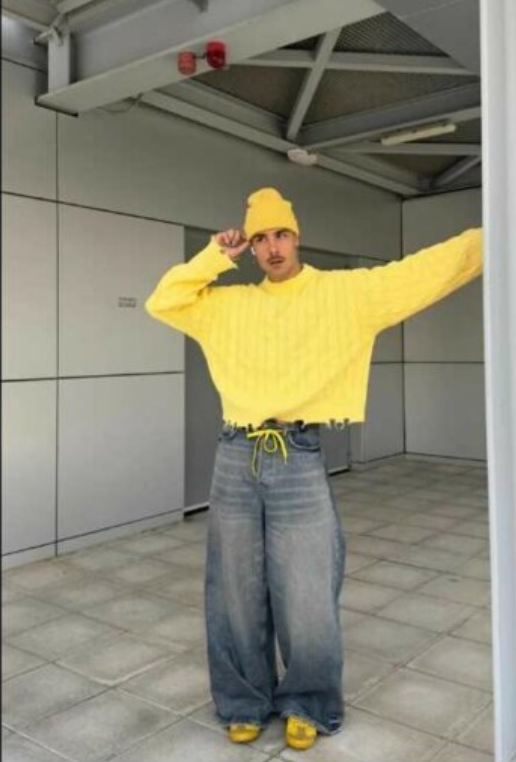

In [29]:
from PIL import Image
import io

# Check if something was uploaded
if upload.value:
    # Get the first uploaded file (as a dict)
    uploaded_file = upload.value[0]

    # Extract content
    image_data = uploaded_file['content']
    image = Image.open(io.BytesIO(image_data)).convert("RGB")

    # Show the image
    display(image)
else:
    print("Please upload an image first.")


In [27]:
import google.generativeai as genai

def get_fashion_feedback_from_image(image_path, description):
    model = genai.GenerativeModel("gemini-1.5-pro-vision")  # or try 2.5-pro if allowed

    img = Image.open(image_path).convert("RGB")

    prompt = f"""
You're a fashion stylist.
Based on this image and the description "{description}", rate the outfit out of 10 and suggest one improvement.
"""

    response = model.generate_content([
        prompt,
        genai.types.content.ImageData.from_pil(img)
    ])

    return response.text.strip()




In [34]:
# feedback_options = generate_dynamic_feedback(image)
inputs=processor(text=descriptions ,images=image,return_tensors='pt',padding=True)
outputs=model(**inputs)
logits_per_image=outputs.logits_per_image
probs=logits_per_image.softmax(dim=1)
best_idx=torch.argmax(probs)

clip_description=descriptions[best_idx]
clip_confidence=probs[0][best_idx].item()

In [36]:
image_path = "image.png"  # <-- Replace with uploaded image

# Load the image
from PIL import Image
image = Image.open(image_path).convert("RGB")

# (Assuming you already ran CLIP inference)
description = clip_description  # just use it directly
print("📸 CLIP Description:", description)

# Now pass this to Gemini
feedback = get_fashion_feedback_from_image(image, description)
print("👗 AI Feedback:", feedback)


📸 CLIP Description: Streetwear outfit with sneakers


AttributeError: 'Image' object has no attribute 'read'

In [81]:
# --- Imports ---
import os
import io
from PIL import Image
import torch
from dotenv import load_dotenv
import google.generativeai as genai
from transformers import CLIPProcessor, CLIPModel
from IPython.display import display
import ipywidgets as widgets

# --- Load Environment Variables ---
load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    raise ValueError("❌ GEMINI API Key not found in environment!")
genai.configure(api_key=GEMINI_API_KEY)

# --- CLIP Model Setup ---
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# --- Outfit Descriptions ---
descriptions = [
    "A person wearing a black hoodie and jeans",
    "A formal suit outfit",
    "Streetwear outfit with sneakers",
    "Colorful retro outfit",
    "Minimalist style with neutral tones",
    "Comfy loungewear",
    "Monochrome aesthetic",
    "Sporty tracksuit",
    "Party-ready outfit with glitter",
    "Professional business look"
]

# --- Upload Widget ---
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)


FileUpload(value=(), accept='image/*', description='Upload')

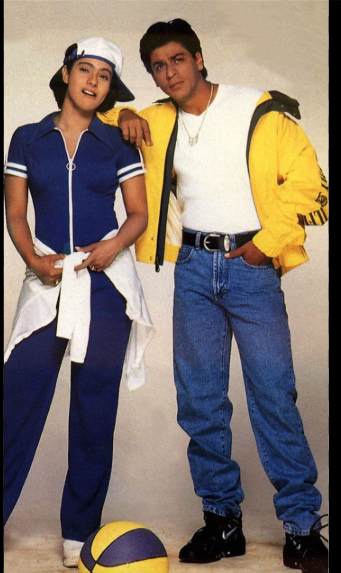

📸 CLIP Description: Colorful retro outfit (0.58)
As a fashion stylist, I'd say this "Colorful retro outfit" absolutely nails its intended vibe! It's a quintessential snapshot of late 80s/early 90s sportswear and casual fashion, full of playful energy and bold primary colors.

**Rating: 8.5/10**

It perfectly captures the "colorful" and "retro" aspects. The bright yellow jacket, the blue activewear, the white accents, and the relaxed denim are all spot-on for the era. The styling, from the backward cap to the tied-waist jacket and chunky sneakers, is authentically period-appropriate and full of personality.

**One Improvement Suggestion:**

For Kajol's outfit, instead of the white jacket tied around her waist, consider swapping it for a **brightly colored fanny pack (perhaps yellow to tie into SRK's jacket or a vibrant red for a pop)** worn either across the body or cinched at the waist. This would maintain the sporty, retro aesthetic and add another intentional splash of color, while c

In [83]:
if not upload.value:
    print("⚠️ Please upload an image first.")
else:
    # Get uploaded image
#     uploaded_file = list(upload.value.values)[0]
#     image_data = uploaded_file['content']
#     image = Image.open(io.BytesIO(image_data)).convert("RGB")
    
    # Get the first uploaded file (as a dict)
    uploaded_file = upload.value[0]

    # Extract content
    image_data = uploaded_file['content']
    image = Image.open(io.BytesIO(image_data)).convert("RGB")


    # Display image
    display(image)

    # Step 1: CLIP to classify outfit
    inputs = clip_processor(text=descriptions, images=image, return_tensors='pt', padding=True)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)
        best_idx = torch.argmax(probs)
        clip_description = descriptions[best_idx]
        clip_confidence = probs[0][best_idx].item()

    print(f"📸 CLIP Description: {clip_description} ({clip_confidence:.2f})")

    # Step 2: Gemini feedback
    model = genai.GenerativeModel("gemini-2.5-flash")
    prompt = f"""
You're a fashion stylist.
This outfit is described as: "{clip_description}".
Rate it out of 10 and suggest one improvement.
"""
    response = model.generate_content([prompt, image])
    if hasattr(response, "text"):
            print(response.text.strip())
    else :
        print(response.candidates[0].content.parts[0].text.strip())

In [89]:
import google.generativeai as genai
from PIL import Image

def generate_description_from_image(image: Image.Image):
    model = genai.GenerativeModel("gemini-2.5-flash")

    prompt = """
You're a fashion stylist and image analyst.
Describe the outfit in this image in as much detail as possible.
Mention clothing types, colors, styles, textures, and accessories.
Avoid making things up. Only describe what’s clearly visible.
"""

    response = model.generate_content([prompt, image])
    return response.text.strip()
def get_fashion_feedback_from_description_and_image(image: Image.Image, description: str):
    model = genai.GenerativeModel("gemini-2.5-flash")

    prompt = f"""
You're a professional fashion critic.
Based on this image and the description: "{description}",
give the outfit a rating out of 10 and suggest one improvement.
"""

    response = model.generate_content([prompt, image])
    return response.text.strip()


In [90]:
description = generate_description_from_image(image)
print("🧥 Description:", description)

# Step 2: Get Gemini’s opinion
feedback = get_fashion_feedback_from_description_and_image(image, description)
print("🎯 Gemini Feedback:", feedback)

🧥 Description: Here's a detailed description of the outfits visible in the image:

**Outfit 1 (Female - on the left):**

*   **Clothing Type & Color:** The individual is wearing a full-length, royal blue jumpsuit. The upper portion has a collared neck and short sleeves. A long, white zipper with a circular pull tab runs down the front. The short sleeves feature two horizontal white stripes near the cuff. The lower portion appears to be relaxed-fit trousers.
*   **Style & Texture:** The jumpsuit has a distinct sporty or athletic wear style, characteristic of the 1990s. The fabric appears smooth, likely a knit material, consistent with comfortable activewear.
*   **Accessories:**
    *   A white long-sleeved top or sweatshirt is tied around her waist, with the sleeves knotted at the front. The fabric looks soft and possibly cotton.
    *   She is wearing a white baseball cap, worn backward, with a dark (possibly blue or black) brim.
    *   Her footwear consists of white athletic shoes o

In [1]:
pip install google-cloud-aiplatform


  Obtaining dependency information for google-cloud-aiplatform from https://files.pythonhosted.org/packages/1f/e9/ce1e48bdc01c22929cb7672579106f013338cc8f535c57fff240ce869047/google_cloud_aiplatform-1.101.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-storage<3.0.0,>=1.32.0 from https://files.pythonhosted.org/packages/d5/94/6db383d8ee1adf45dc6c73477152b82731fa4c4a46d9c1932cc8757e0fd4/google_cloud_storage-2.19.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-bigquery!=3.20.0,<4.0.0,>=1.15.0 from https://files.pythonhosted.org/packages/b1/7e/7115c4f67ca0bc678f25bff1eab56cc37d06eb9a3978940b2ebd0705aa0a/google_cloud_bigquery-3.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-resource-manager<3.0.0,>=1.3.3 from https://files.pythonhosted.org/packages/b1/ea/a92631c358da377af34d3a9682c97af83185c2d66363d5939ab4a1169a7f/google_cloud_resource_manager-1.14.2-py3-none-any.whl.metadata
  Obtain

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.11.7 which is incompatible.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [2]:
from vertexai.preview.generative_models import GenerativeModel

model = GenerativeModel("imagen-3.0-generate-002")  # Or another listed model

prompt = "A fashionable person in a streetwear outfit, with wide-leg jeans, a yellow cropped sweater, and an olive green crossbody bag."

response = model.generate_content(prompt)
image = response.images[0]  # PIL Image

image.show()


C:\Users\sathy\anaconda3\Lib\site-packages\vertexai\generative_models\_generative_models.py:433: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


GoogleAuthError: Unable to find your project. Please provide a project ID by:
- Passing a constructor argument
- Using vertexai.init()
- Setting project using 'gcloud config set project my-project'
- Setting a GCP environment variable
- To create a Google Cloud project, please follow guidance at https://developers.google.com/workspace/guides/create-project